 <h1><center>Ad Click Prediction</center></h1>

The goal of the project is to __Predict who is likely going to click on the Ad__.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score, accuracy_score, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load Data 

In [2]:
# Read the files
df = pd.read_csv('advertising.csv')

# Examine the data

In [3]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


# Data type and length of the variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.5+ KB


# Duplicates Checkup

In [5]:
df.duplicated().sum()

0

# Numerical and Categorical Variables Identification

In [6]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [8]:
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ] 

# Summarizing Numerical Variables

In [9]:
df[numeric_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


# Summarizing Categorical Variables

In [10]:
df[Categorical_cols].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Team-oriented dynamic forecast,Lisamouth,Czech Republic
freq,1,3,9


# Check for Missing Values

In [11]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# Extracting Date - Time variables

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['time'] = df['Timestamp'].dt.time
df["weekday"] = df['Timestamp'].dt.dayofweek
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6

df = df.drop(['Timestamp'], axis=1) # deleting timestamp

In [13]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,time,weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,00:53:11,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,20:35:42,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,02:31:19,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,03:36:18,4


# Visualize Target Variable (Clicked on Ad)

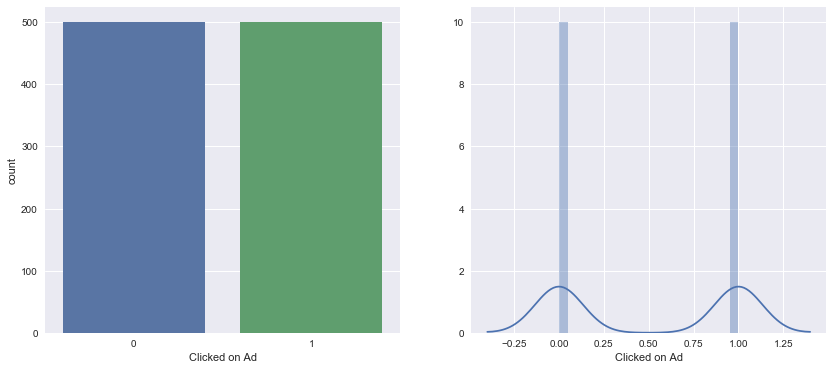

In [14]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.countplot(x = 'Clicked on Ad', data = df)
plt.subplot(1,2,2)
sns.distplot(df["Clicked on Ad"], bins = 20)
plt.show()

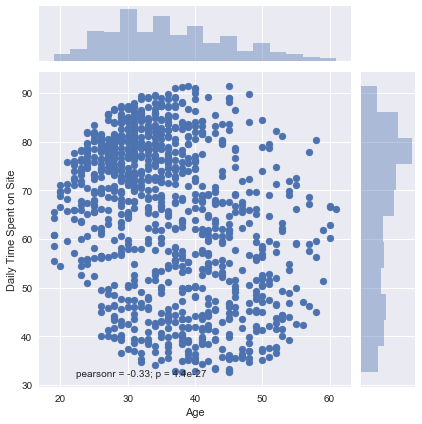

In [15]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

Its a tie! Equal number of people have clicked and not clicked on the Ad.

### Distribution and Relationship between variables where users have clicked on Ad or not

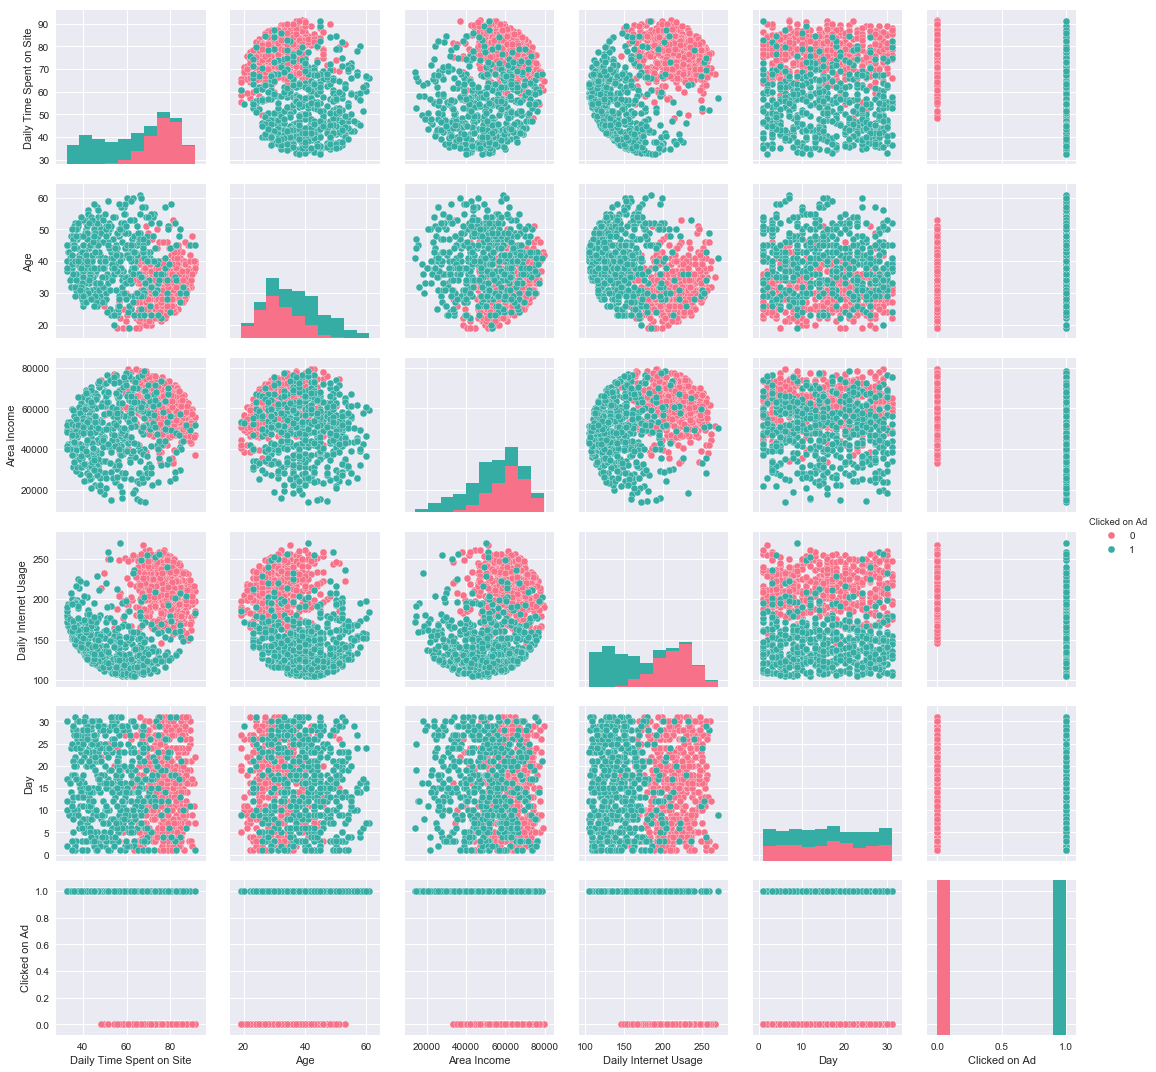

In [16]:
sns.pairplot(df, vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Day', 'Clicked on Ad' ], 
             hue = "Clicked on Ad", palette='husl')

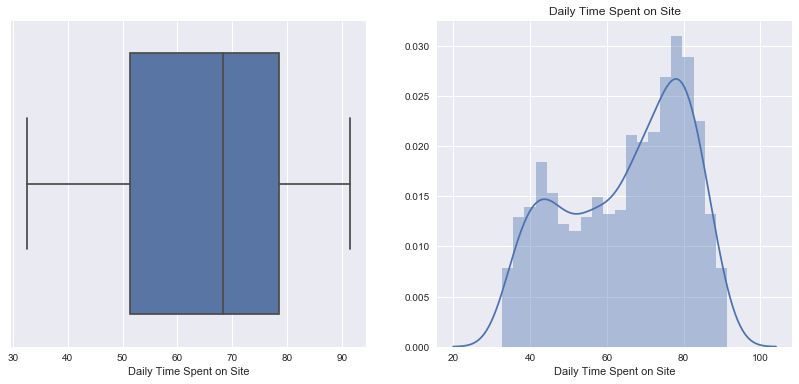

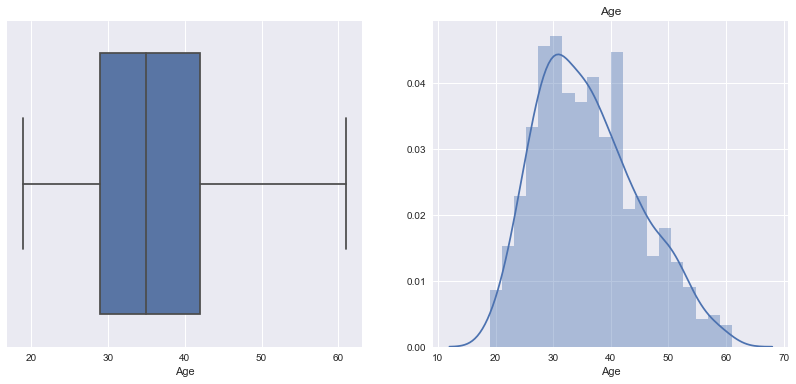

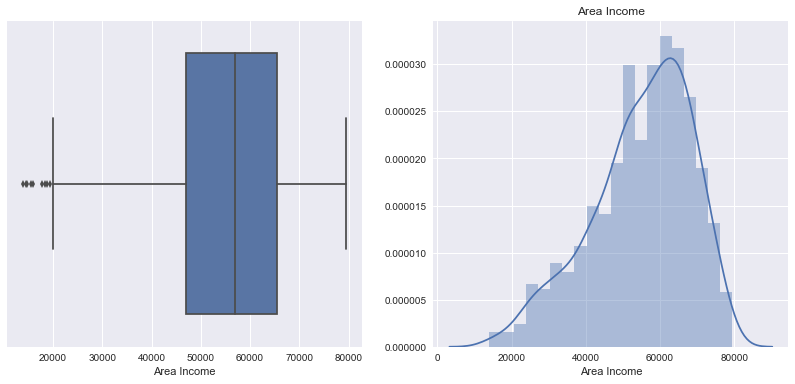

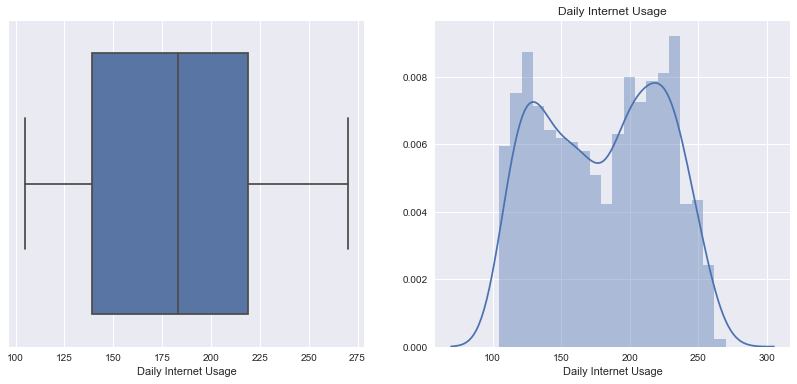

In [17]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 20)    
    plt.title(i)    
    plt.show()

### Correlation Between Variables

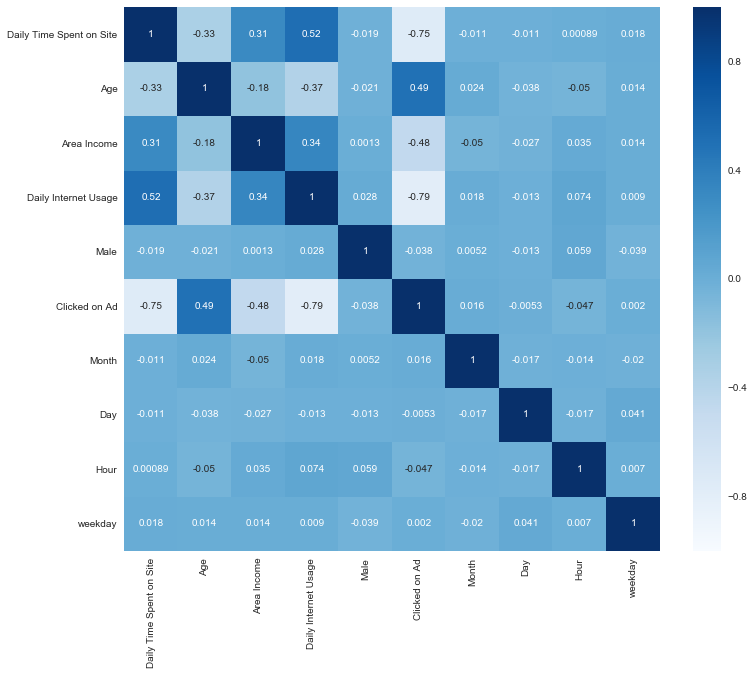

In [18]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='Blues', annot = True)

# Extracted Features Visualizations

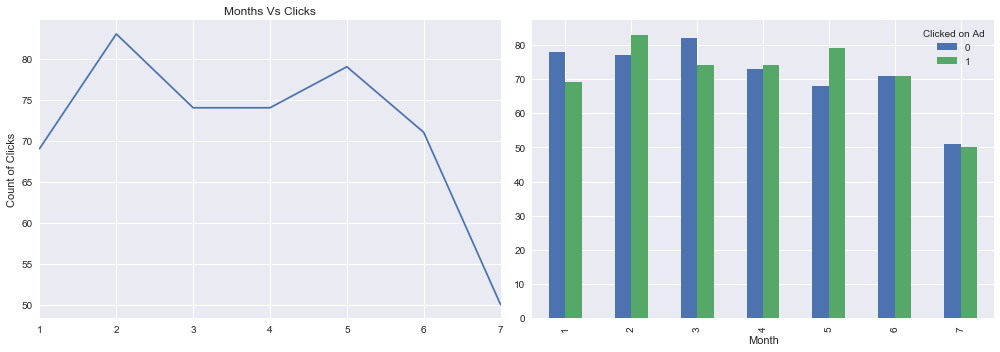

In [19]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'Bar',ax=ax[1])
#df.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

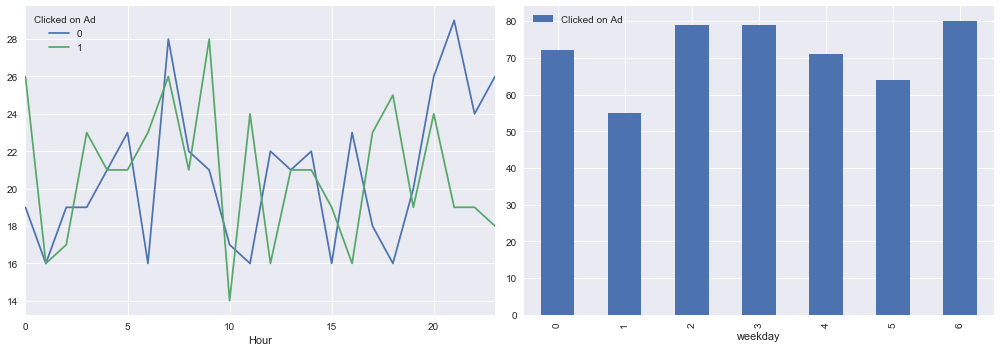

In [20]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'Bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

### Countries with most clicks

In [21]:
df.groupby('Country')['Clicked on Ad'].sum().nlargest(10)   # gives alphabetically
#df['Country'][df['Clicked on Ad']==1].value_counts().nlargest(10)

Country
Australia        7
Ethiopia         7
Turkey           7
Liberia          6
Liechtenstein    6
South Africa     6
Afghanistan      5
France           5
Hungary          5
Mayotte          5
Name: Clicked on Ad, dtype: int64

In [22]:
df.groupby('Country')['Clicked on Ad'].mean().nlargest(10)

Country
Andorra                                                1.0
British Indian Ocean Territory (Chagos Archipelago)    1.0
Ethiopia                                               1.0
Germany                                                1.0
Kenya                                                  1.0
Kiribati                                               1.0
Latvia                                                 1.0
Liechtenstein                                          1.0
Lithuania                                              1.0
Macao                                                  1.0
Name: Clicked on Ad, dtype: float64

### Clicked Vs Not Clicked Average

In [23]:
df.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


### Distribution of clicks by gender

In [24]:
hdf = pd.pivot_table(df, index = ['Hour'], columns = ['Male'], values = ['Clicked on Ad'], 
                     aggfunc= np.sum).rename(columns = {'Clicked on Ad':'Clicked'})

cm = sns.light_palette("green", as_cmap=True)
hdf.style.background_gradient(cmap=cm)  # Sums all 1's i.e clicked for each hour

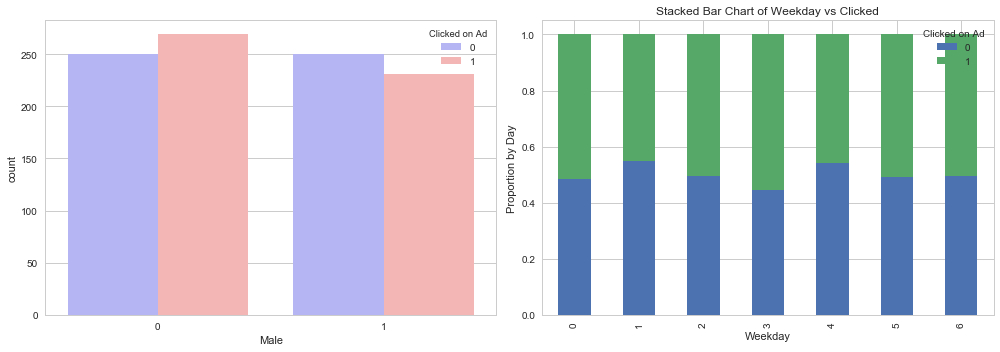

In [31]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='Male',hue='Clicked on Ad',data=df,palette='bwr', ax = ax[0]) # Overall distribution of Males and females count
pd.crosstab(df['weekday'],df['Clicked on Ad']).div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1]) # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

# Use IQR To Identify Potential Outliers

In [35]:
for i in numeric_cols:
    stat = df[i].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64
The upper and lower bounds for suspected outliers are 119.32875 and 10.57875.
count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64
The upper and lower bounds for suspected outliers are 61.5 and 9.5.
count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64
The upper and lower bounds for suspected outliers are 93128.88375000001 and 19373.553749999992.
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218

# Model Building